In [55]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
# dataset 1 is job listings

In [43]:
job_listings = pd.read_csv('Datasets/job_listings.csv', dtype={"title":str, "company_name":str, "city":str, "region":str, "zip":str, "created":str, "last_checked":str, "last_updated":str, "delete_date":str, "onet_occupation_code":str, "SOC_occupation_code":str, "url":str, "stock_exchange_country":str, "stock_exchange_name":str, "stock_ticker":str, "ticker_end_date":str, "ticker_start_date":str})
job_listings["created"] = job_listings.created.apply(lambda x: datetime.fromisoformat(x))
job_listings["delete_date"] = job_listings.delete_date.apply(lambda x: datetime.fromisoformat(x))

In [6]:
# not using this
onet_code_legend = pd.read_csv('Datasets/Code Legends/onet_code_legend.csv')

In [7]:
soc_code_legend = pd.read_csv('Datasets/Code Legends/soc_code_legend.csv')

In [114]:
job_listings["created_year"] = [x.year for x in job_listings.created]
job_listings["created_month"] = [x.month for x in job_listings.created]
job_listings["deleted_year"] = [x.year for x in job_listings.delete_date]
job_listings["deleted_month"] = [x.month for x in job_listings.delete_date]

In [173]:
jobcountsList = []
datesList = []
datesList2 = []
monthmap = {"1":"Jan", "2":"Feb", "3":"Mar", "4":"Apr", "5":"May", "6":"Jun", "7":"Jul", "8":"Aug", "9":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
years = []
for year in range (2011, 2020, 1):
    years.append(year)
    jobcounts = []
    dates = []   
    dates2 = [] 
    for month in range(1,13,1):
        # this = job_listings[job_listings.created.apply(lambda x:  x.year <= year and  x.month <= month) & job_listings.delete_date.apply(lambda x:  x.year >= year and  x.month >= month)]
        this = job_listings

        this = this[this.created_year <= year]
        this = this[this.created_month <= month]
        this = this[this.deleted_year >= year]
        this = this[this.deleted_month >= month]
        # job_listings.deleted_year >= year & job_listings.deleted_month >= month]
        jobcounts.append(this["title"].count())
        dates2.append("{} {}".format(monthmap[str(month)],"'"+str(year).lstrip("20")))
        dates.append("{}".format(monthmap[str(month)]))
    jobcountsList.append(jobcounts)
    datesList.append(dates)
    datesList2.append(dates2)    




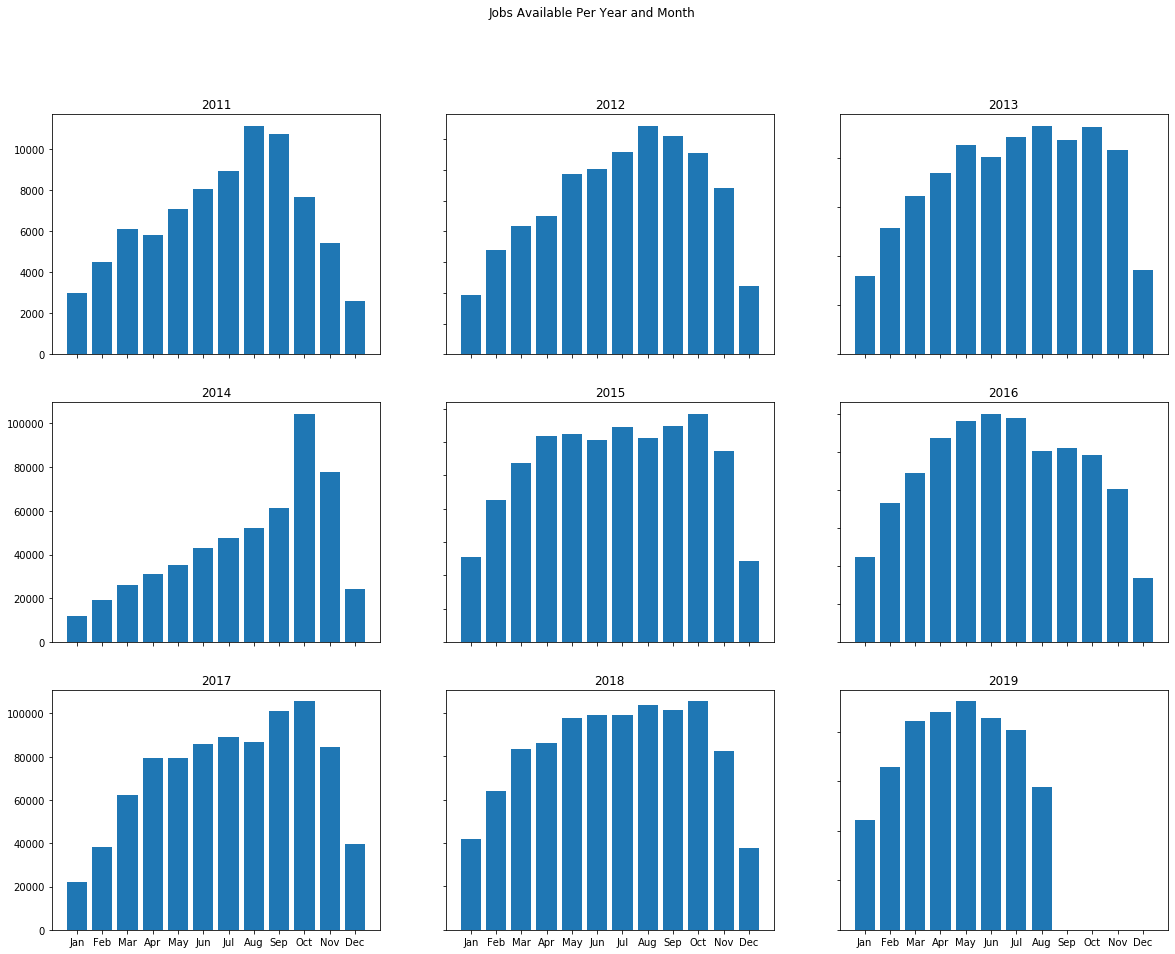

In [189]:
#plot by year
# plt.figure(figsize=(20,10))
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
fig.suptitle('Jobs Available Per Year and Month')
for ax,dates, jobcounts, year in zip(axs.flat, datesList, jobcountsList, years):
    ax.bar(dates,jobcounts)
    ax.set_title(str(year))

for ax in axs.flat:
    ax.label_outer()
            

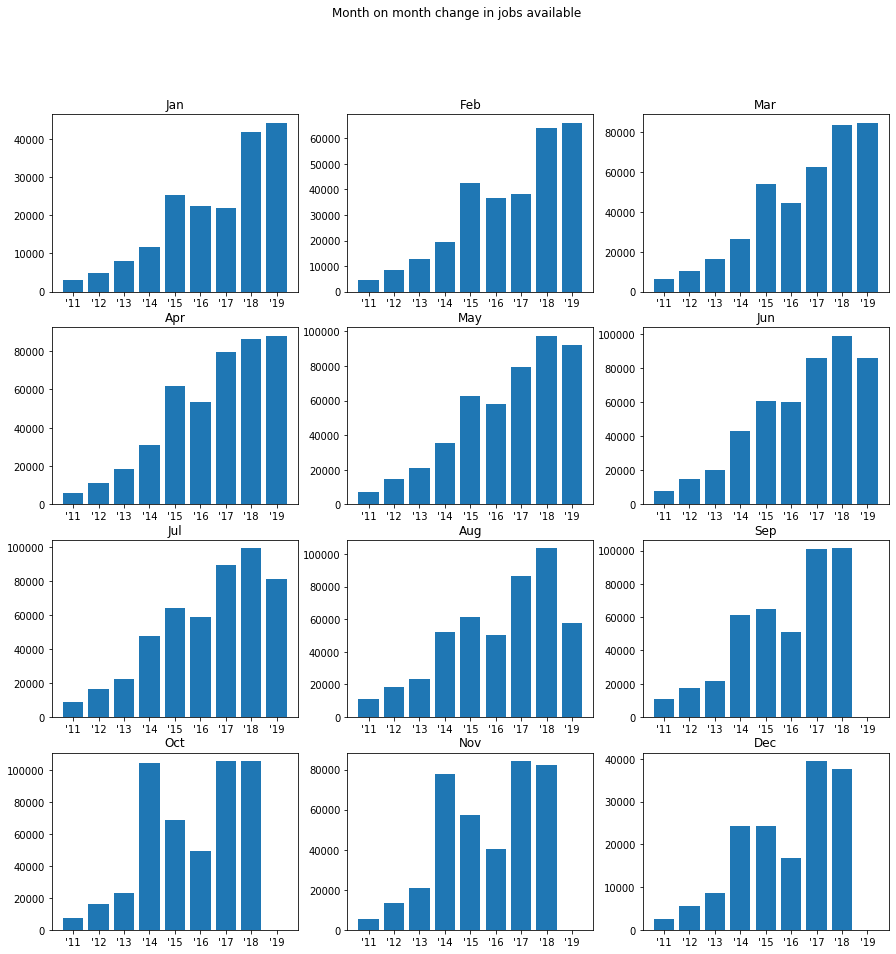

In [187]:
#plot by month
# plt.figure(figsize=(20,10))
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.suptitle('Month on month change in jobs available')

datesListnp = np.array(datesList2)

# datesListnp = np.array(map(lambda x : x.split()[1], datesListnp))
jobcountsListnp = np.array(jobcountsList)
# for i, year in enumerate(years):

for ax,dates, jobcounts in zip(axs.flat, datesListnp.T, jobcountsListnp.T):
    newdates = [date.split()[1] for date in dates]
    mth = dates[0].split()[0]
    ax.bar(newdates,jobcounts)
    ax.set_title(str(mth))

# for ax in axs.flat:
#     ax.label_outer()

In [202]:
job_listings.dropna(

,title,company_name,city,region,zip,created,last_checked,last_updated,delete_date,onet_occupation_code,...,stock_exchange_country,stock_exchange_name,stock_ticker,ticker_end_date,ticker_start_date,created_year,created_month,deleted_year,deleted_month,place
0,Plant Operator 3,Ecolab Inc.,Aberdeen,Scotland,AB25,2014-12-10 12:36:33+00:00,2014-12-14T15:38:40+00:00,NaN,2014-12-16 15:58:17+00:00,51-8013.00,...,US,NYS,ECL,NaN,1986-12-10,2014,12,2014,12,"Aberdeen, Scotland"
1,Service Specialist - Pest,Ecolab Inc.,London,England,SW1A,2017-07-05 00:46:00+00:00,2017-09-23T12:52:00+00:00,NaN,2017-09-24 13:03:55+00:00,37-2021.00,...,US,NYS,ECL,NaN,1986-12-10,2017,7,2017,9,"London, England"
2,Service Specialist - Romford,Ecolab Inc.,NaN,NaN,NaN,2018-05-21 00:42:00+00:00,2018-06-11T07:35:00+00:00,NaN,2018-06-12 09:56:00+00:00,99-9999.00,...,US,NYS,ECL,NaN,1986-12-10,2018,5,2018,6,NaN
3,Service Specialist - Pest,Ecolab Inc.,Cambridge,England,NaN,2017-11-02 19:51:00+00:00,2017-12-05T15:40:00+00:00,NaN,2017-12-09 02:56:58+00:00,37-2021.00,...,US,NYS,ECL,NaN,1986-12-10,2017,11,2017,12,"Cambridge, England"
4,Application Engineer I,Ecolab Inc.,Aberdeen,Scotland,AB25,2014-01-07 22:48:08+00:00,2014-04-06T19:03:00+00:00,NaN,2014-04-08 19:27:57+00:00,15-1132.00,...,US,NYS,ECL,NaN,1986-12-10,2014,1,2014,4,"Aberdeen, Scotland"
5,Pest Elimination Service Specialist,Ecolab Inc.,London,England,SW1A,2017-12-14 15:26:50+00:00,2018-01-03T15:35:30+00:00,NaN,2018-01-04 15:44:35+00:00,99-9999.00,...,US,NYS,ECL,NaN,1986-12-10,2017,12,2018,1,"London, England"
6,Territory Manager - Unassigned,Ecolab Inc.,Northampton,England,NN1,2017-12-23 12:45:00+00:00,2018-03-19T09:38:00+00:00,NaN,2018-03-20 09:44:00+00:00,11-2022.00,...,US,NYS,ECL,NaN,1986-12-10,2017,12,2018,3,"Northampton, England"
7,Account Manager,Ecolab Inc.,Aberdeen,Scotland,AB25,2019-07-26 07:16:00+00:00,2019-07-29T07:55:00+00:00,NaN,2019-07-30 08:26:00+00:00,41-1012.00,...,US,NYS,ECL,NaN,1986-12-10,2019,7,2019,7,"Aberdeen, Scotland"
8,Pest Control Service Specialist - Aberdeen,Ecolab Inc.,Aberdeen,Scotland,AB25,2019-04-09 06:13:00+00:00,2019-05-08T03:43:00+00:00,NaN,2019-05-09 03:47:00+00:00,37-2021.00,...,US,NYS,ECL,NaN,1986-12-10,2019,4,2019,5,"Aberdeen, Scotland"
9,Demand Planner,Ecolab Inc.,Marston,England,CW9,2019-02-07 11:32:00+00:00,2019-05-19T17:31:00+00:00,2019-03-22T02:34:00+00:00,2019-05-20 20:48:00+00:00,13-1081.00,...,US,NYS,ECL,NaN,1986-12-10,2019,2,2019,5,"Marston, England"
